In [1]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

In [2]:
# 캐글 API 버전 갱신을 위한 작업... 반드시 버전이 1.5.6 이어야 함

!ls -lha kaggle.json

!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

-rw-r--r-- 1 root root 62 Nov 25 07:01 kaggle.json
Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)
Processing /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674/kaggle-1.5.6-cp36-none-any.whl


In [3]:

# 캐글연동을 위한 토큰 입력
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


# 버전이 1.5.6 이 아니면, 진행할 수 없다
! kaggle -v


Kaggle API 1.5.6


In [4]:

! kaggle competitions download -c 2019-ml-finalproject
! unzip 2019-ml-finalproject.zip

2019-ml-finalproject.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  2019-ml-finalproject.zip
replace Label2Names.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## [수정O] 라이브러리 로드
- 필요시 라이브러리 추가 가능

In [0]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import pandas as pd
import numpy as np
import imutils 
import cv2 
import os
from tqdm import tqdm

from PIL import Image

import matplotlib.pyplot as plt
from sklearn.svm import SVC



In [0]:
df_data=pd.read_csv('/content/Label2Names.csv',header=None)
class_name=df_data[1].tolist()
df_data

class_name.append('BACKGROUND_Google')

In [7]:
train_root_path="./train"
len(os.listdir(train_root_path))
train_data=[]
label=[]
cn=0
for lis in tqdm(class_name):
  img_list=os.listdir(train_root_path+'/'+lis)

  for i in img_list:
    image=cv2.imread(train_root_path+'/'+lis+'/'+i)
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    train_data.append(gray)
    label.append(cn)
  cn+=1

100%|██████████| 102/102 [00:03<00:00, 31.80it/s]


In [0]:
def weak_sift(gray):
  sift=cv2.xfeatures2d_SIFT.create()
  kp,des=sift.detectAndCompute(gray,None)

  return kp,des
  
def dense_sift(gray,step):
  sift=cv2.xfeatures2d_SIFT.create()
  keypoints=[]
  w,h=gray.shape
  keypoints=[cv2.KeyPoint(i,j,step) for i in range(0,h,step) for j in range(0,w,step)]
  kp,des=sift.compute(gray,keypoints)

  return kp,des

# **Weak Features**


(313, 128)
[[ 14.  24.   2. ...   0.   0.   4.]
 [  1.   2.   0. ...   0.   0.   8.]
 [  0.  25.  18. ... 118.  75.   3.]
 ...
 [  3.   0.   0. ...   0.   0.  21.]
 [  3.  10.  31. ...   0.   0.   0.]
 [  1.   5. 146. ...  10.   2.   3.]]


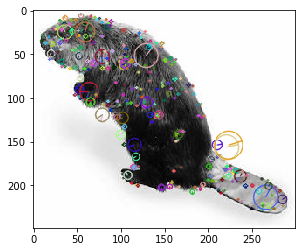

In [20]:
kp,des=weak_sift(train_data[304])
img=cv2.drawKeypoints(train_data[304],kp,train_data[304],flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
print(des.shape)
print(des)
plt.imshow(img)

**# Strong Feature**

step_size: 8, diameter: 8

(1216, 128)
[[  0.   0.   0. ...   6.   5.   3.]
 [  0.   0.   0. ...  56.  83.  50.]
 [  0.   0.   0. ...  80. 108.  82.]
 ...
 [ 12.  52.  18. ...   0.   0.   0.]
 [ 19.  12.  55. ...   0.   0.   0.]
 [ 36.  21.  99. ...   0.   0.   0.]]


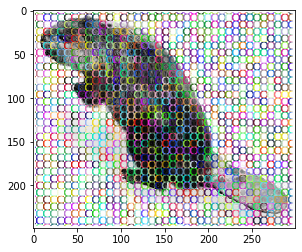

In [21]:
kp,des=dense_sift(train_data[304],8)
img=cv2.drawKeypoints(train_data[304],kp,train_data[304],flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
print(des.shape)
print(des)
plt.imshow(img)